# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Added by JMD
from sklearn.metrics import f1_score
# Define random_state once here so it can be changed globally
random_state = 1

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset

# Use as_frame = True to get data as pandas objects
data = load_breast_cancer(as_frame = True)
# Use X and y for feature and target variables
X = data.data
y = data.target
# Swap 0 and 1 so that 1 codes for malignant (i.e., positive for cancer)
y = 1 - y
# Likewise swap target names by reversing the order
target_names = data.target_names[::-1]

In [3]:
# Split the dataset into training and testing sets

# For this exercise I've chosen to reduce the size of the test set from the default (0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, stratify = y)
print("training set size:", y_train.size)
print("test set size:", y_test.size)
print("test set value counts:")
y_test.value_counts()

training set size: 455
test set size: 114
test set value counts:


,count
target,
0,72
1,42


In [4]:
# Display first 5 rows

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Count classes to check for imbalance

y.value_counts()

,count
target,
0,357
1,212


Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [6]:
# Create a Decision Tree model

DT_model = DecisionTreeClassifier(random_state = random_state)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

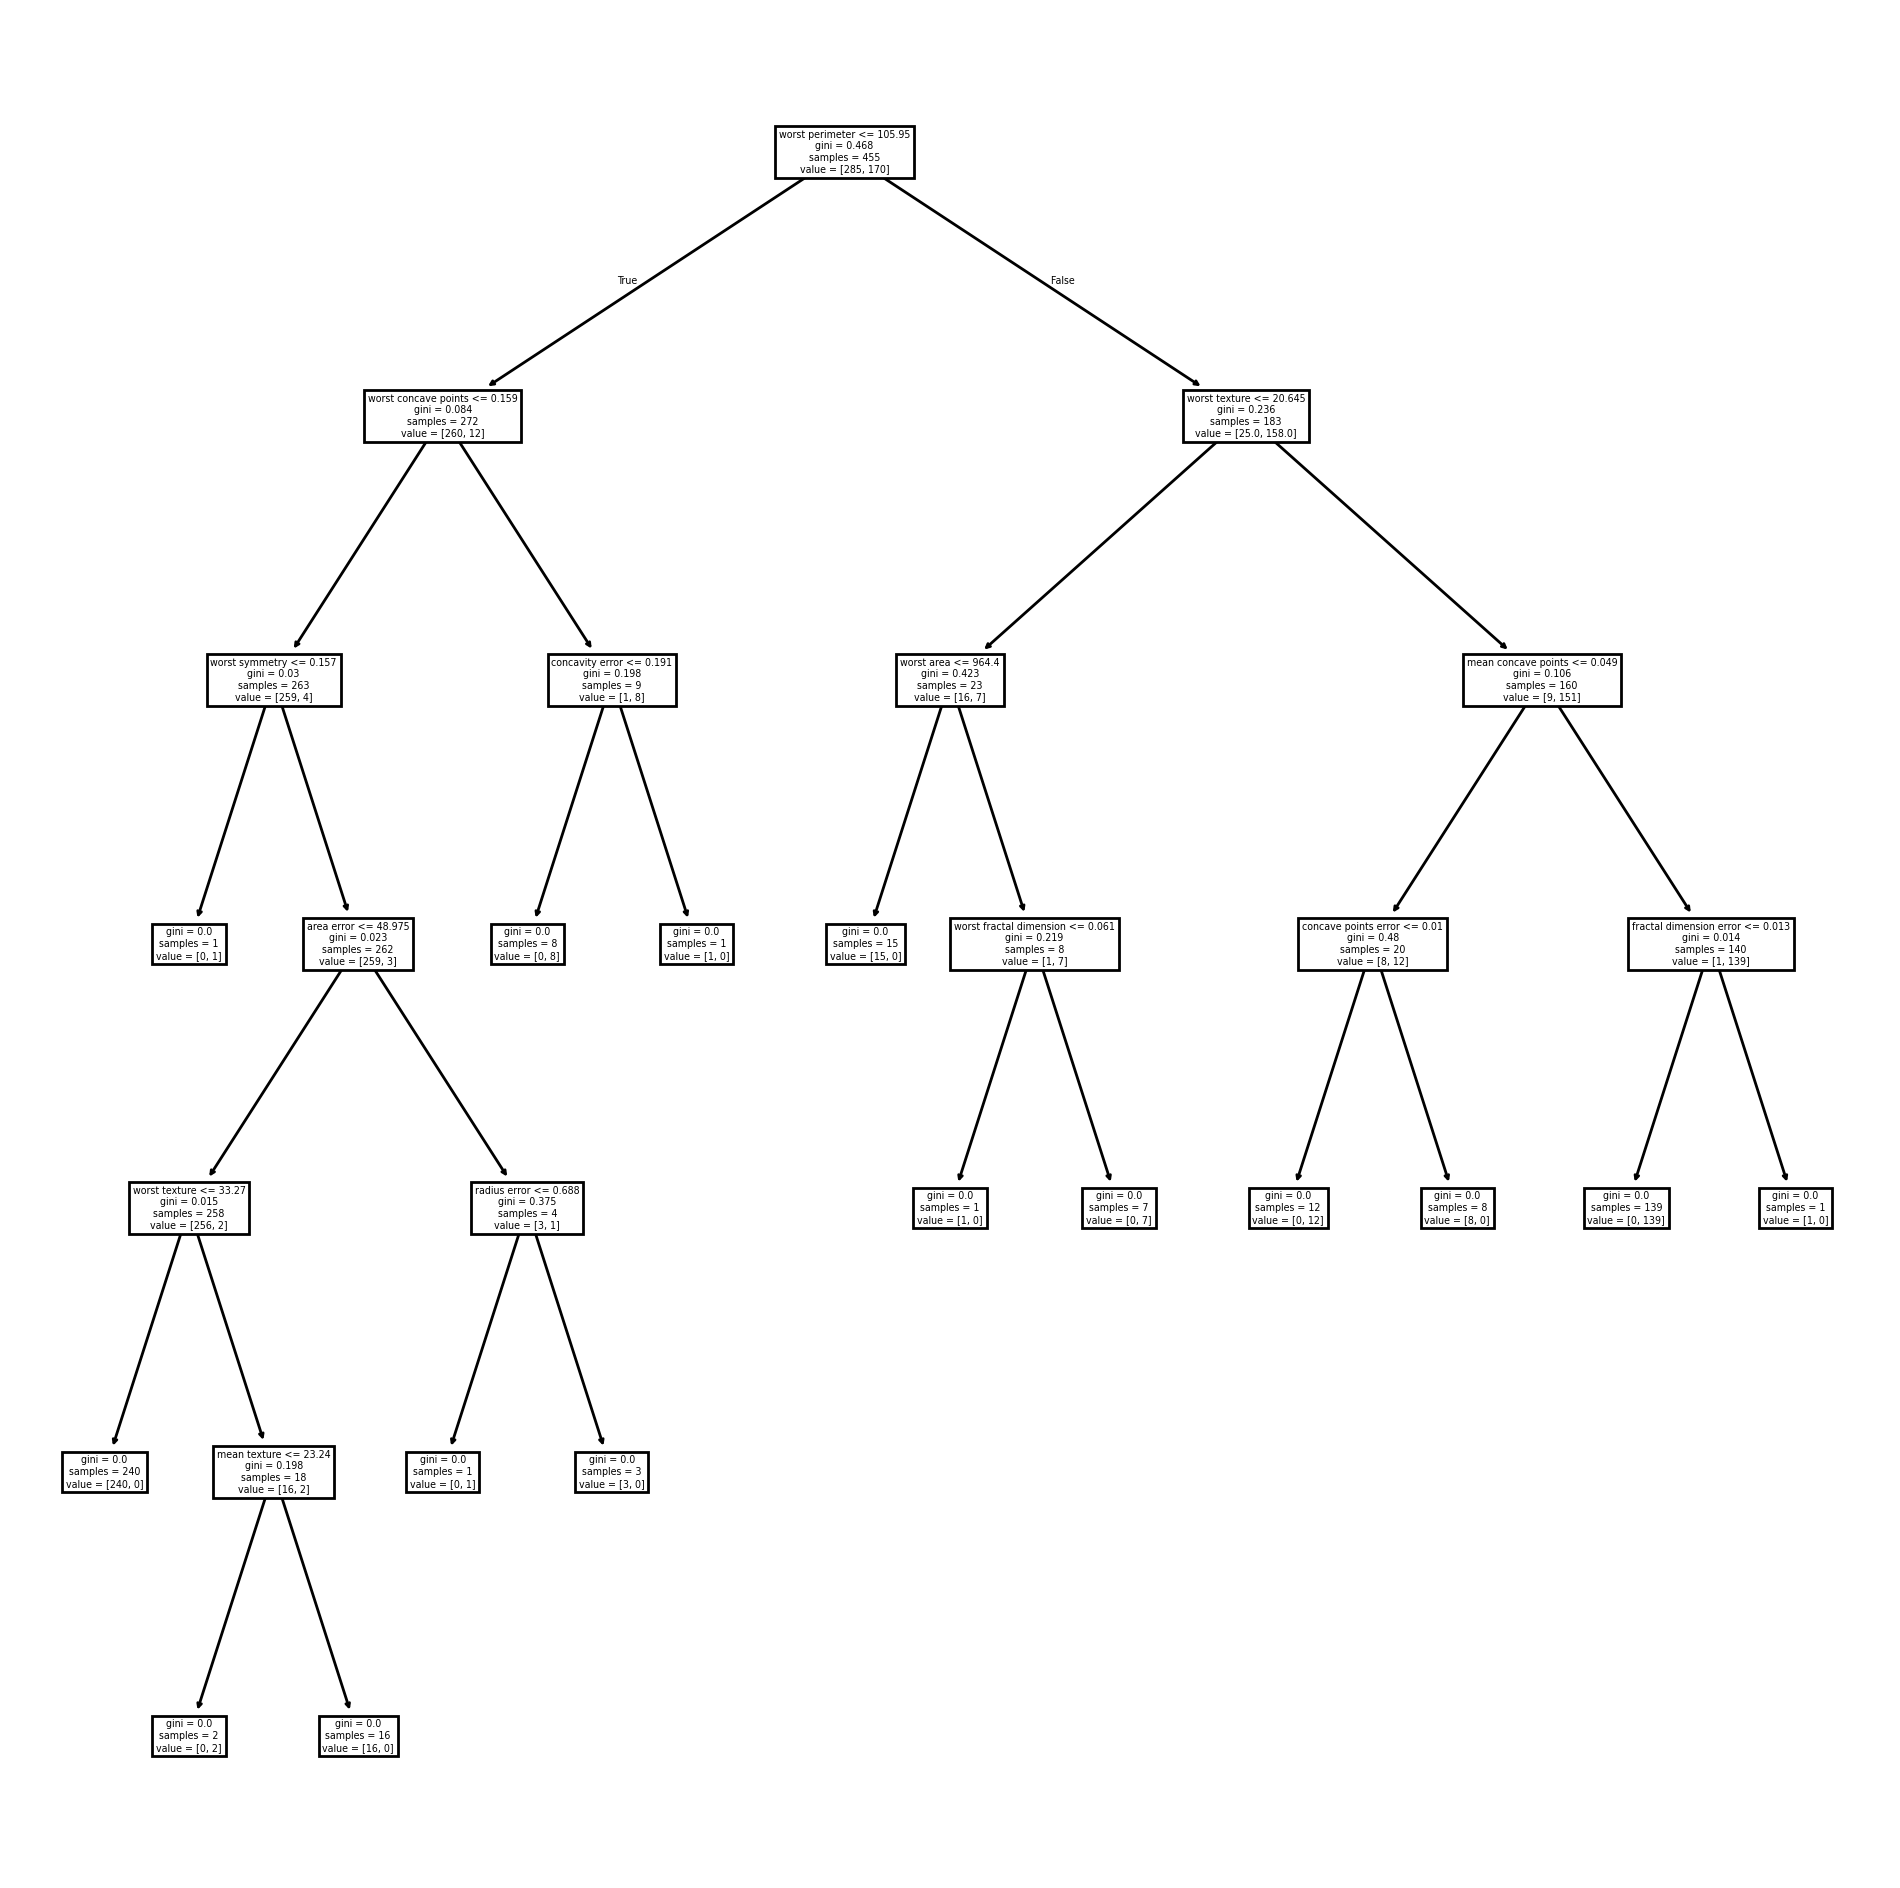

In [7]:
# Visualize the Decision Tree
plt.figure(figsize = (12, 12), dpi = 200)
# Use feature names https://stackoverflow.com/questions/64883963/how-do-you-find-feature-names-for-decision-tree-classification
pt_ = plot_tree(DT_model, feature_names = data.feature_names)

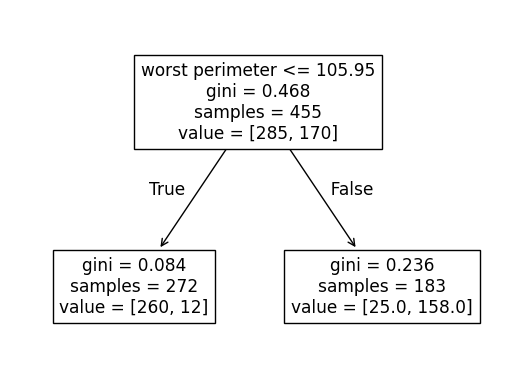

In [8]:
# Fit tree with max_depth = 1 (a stump)
DT_model_1 = DecisionTreeClassifier(max_depth = 1, random_state = random_state)
DT_model_1.fit(X_train, y_train)
pt_ = plot_tree(DT_model_1, feature_names = data.feature_names)

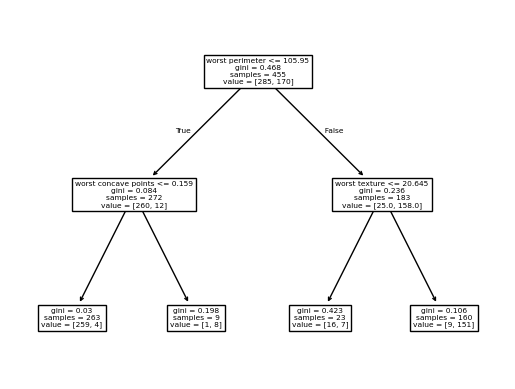

In [9]:
# Fit tree with max_leaf_nodes = 4
DT_model_2 = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = random_state)
DT_model_2.fit(X_train, y_train)
pt_ = plot_tree(DT_model_2, feature_names = data.feature_names)

Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [10]:
# Train random forest model

RF_model = RandomForestClassifier(random_state = random_state)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [11]:
# Extract feature importances

# This just gets a pandas array without names
importances = RF_model.feature_importances_
# This creates a pandas series with names
forest_importances = pd.Series(importances, index = data.feature_names)

worst concave points       0.116656
worst perimeter            0.109035
worst radius               0.108366
worst area                 0.107679
mean concave points        0.102401
mean concavity             0.072188
mean radius                0.066237
mean perimeter             0.053515
mean area                  0.046446
area error                 0.028159
worst concavity            0.027801
worst texture              0.019556
mean texture               0.017677
radius error               0.017643
worst compactness          0.013233
worst symmetry             0.011268
worst smoothness           0.010894
worst fractal dimension    0.010334
texture error              0.007231
perimeter error            0.007009
mean smoothness            0.006598
concave points error       0.005769
mean compactness           0.005308
concavity error            0.005082
symmetry error             0.004825
fractal dimension error    0.004709
compactness error          0.003937
smoothness error           0

<Axes: >

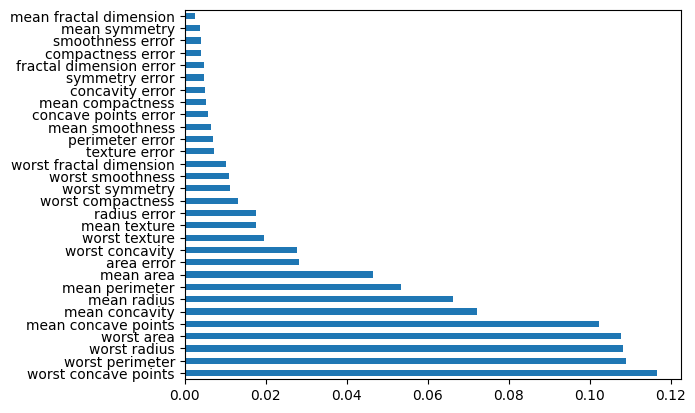

In [12]:
# Print feature importance

# Print the values sorted from largest to smallest
forest_importances_sort = forest_importances.sort_values(ascending = False)
print(forest_importances_sort)
# Make a bar plot to visualize the importances
forest_importances_sort.plot.barh()

AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [13]:
# Build and train an AdaBoostClassifier on your training data.

# Initialize decision tree classifier with max depth equal to 1
DTC = DecisionTreeClassifier(max_depth = 1)
AB_model = AdaBoostClassifier(estimator = DTC, random_state = random_state)
AB_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=1)

In [14]:
# Evaluate models with default parameters

print("Accuracy of models with default hyperparameters:")

DT_predict = DT_model.predict(X_test)
DT_accuracy = accuracy_score(DT_predict, y_test)
print(f"DecisionTree: {DT_accuracy:.2f}")

RF_predict = RF_model.predict(X_test)
RF_accuracy = accuracy_score(RF_predict, y_test)
print(f"RandomForest: {RF_accuracy:.2f}")

AB_predict = AB_model.predict(X_test)
AB_accuracy = accuracy_score(AB_predict, y_test)
print(f"AdaBoost: {AB_accuracy:.2f}")

# Also calculate F1 scores
print("\nF1 score of models with default hyperparameters:")
DT_F1 = f1_score(DT_predict, y_test)
RF_F1 = f1_score(RF_predict, y_test)
AB_F1 = f1_score(AB_predict, y_test)
print(f"DecisionTree: {DT_F1:.2f}")
print(f"RandomForest: {RF_F1:.2f}")
print(f"AdaBoost: {AB_F1:.2f}")

Accuracy of models with default hyperparameters:
DecisionTree: 0.93
RandomForest: 0.96
AdaBoost: 0.95

F1 score of models with default hyperparameters:
DecisionTree: 0.90
RandomForest: 0.94
AdaBoost: 0.93


In [15]:
# Evaluate models after adjusting hyperparameters

print("Accuracy of models with max_leaf_nodes = 8:")

DT_model = DecisionTreeClassifier(max_leaf_nodes = 8, random_state = random_state)
DT_model.fit(X_train, y_train)
DT_predict = DT_model.predict(X_test)
DT_accuracy = accuracy_score(DT_predict, y_test)
print(f"DecisionTree: {DT_accuracy:.2f}")

RF_model = RandomForestClassifier(max_leaf_nodes = 8, random_state = random_state)
RF_model.fit(X_train, y_train)
RF_predict = RF_model.predict(X_test)
RF_accuracy = accuracy_score(RF_predict, y_test)
print(f"RandomForest: {RF_accuracy:.2f}")

DTC = DecisionTreeClassifier(max_leaf_nodes = 8)
AB_model = AdaBoostClassifier(estimator = DTC, random_state = random_state)
AB_model.fit(X_train, y_train)
AB_predict = AB_model.predict(X_test)
AB_accuracy = accuracy_score(AB_predict, y_test)
print(f"AdaBoost: {AB_accuracy:.2f}")

# Also calculate F1 scores
print("\nF1 score of models with max_leaf_nodes = 8:")
DT_F1 = f1_score(DT_predict, y_test)
RF_F1 = f1_score(RF_predict, y_test)
AB_F1 = f1_score(AB_predict, y_test)
print(f"DecisionTree: {DT_F1:.2f}")
print(f"RandomForest: {RF_F1:.2f}")
print(f"AdaBoost: {AB_F1:.2f}")

Accuracy of models with max_leaf_nodes = 8:
DecisionTree: 0.92
RandomForest: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: 0.98

F1 score of models with max_leaf_nodes = 8:
DecisionTree: 0.89
RandomForest: 0.93
AdaBoost: 0.98


# Write-up by Jeffrey Dick

## Loading data

This uses the same breast cancer dataset as in the previous mini-project. Similarly to that project, I swapped the target values so that 0 and 1 code for benign and malignant, respectively. To make the train-test split I decreased the test size to 0.2 (the default is 0.3) because this is a fairly small dataset and I want to use more data for training.

## Data exploration

Data exploration was covered in more depth in the previous project. Briefly, printing the first five rows shows that the features have different scales, but this isn't a problem for decision tree-based methods. As before, we have 357 benign and 212 malignant cases so there isn't a large imbalance between the classes. However, to be on the safe side, I have used `stratify = y` when splitting the data to keep the same imbalance between classes in the train and test sets.

**NOTE**: For splitting the dataset and running all models the `random_state` parameters is set to obtain reproducible results.

## Decision trees

We start by fitting a decision tree using the default parameters for `DecisionTreeModel()`. The split at the root node is on *worst perimeter*, and this has a high Gini index (0.468), indicating high impurity in the classifications at this node. Nevertheless, the majority of samples (260 out of 272) with *worst perimeter* <= 105.95 are benign, and most of the others (158 out of 183) are malignant. At the next level, the splits are on *worst concave points* and *worst texture*, and these have lower Gini impurity (0.084 and 0.236, respectively) than the root node. The Gini impurity of all the leaf nodes is 0, indicating perfect classification of the training data. A drawback of such a complex decision tree is overfitting and low accuracy on test data.

Although each branch is interpretable at face value, an intuitive understanding of such as large tree is rather difficult. By setting max_depth to 1 we create a much simpler tree with only one branch (a stump). The stump is easy to interpret, but has a lower classification accuracy. In contrast to the previous tree where each of the 15 leaf nodes had a Gini index of 0, the leaves in the sump have non-zero Gini indexes, indicating some impurity in the classifications. However, an advantage of the stump is that it avoids overfitting.

We can make a somewhat more complex tree by setting the maximum number of leaf nodes to 4. Just like the stump, the root node in this tree splits on *worst perimeter*, but the splits on the next level are on *worst concave points* and *worst texture*. Although these features are used in this small decision tree, they were not identified as having high feature importance in the logistic regression project - this shows how different ML algorithms can leverage distinct subsets of features.

## Random forests

In the first iteration above, the random forest is created with default parameters. *worst concave points* is the feature with the highest importance. This feature was also present in the individual decision trees created above. Other features with high importance include *worst perimter*, *worst radius*, and *worst area*, which were identified previously in the logistic regression project. Therefore, feature importance in logistic regression and Random Forests overlap to some extent, but there are still differences, especially with respect to *worst concave points*, which is more important in Random Forests.

## AdaBoost and model evaluation

For models created with default hyperparameters, there is a slightly higher accuracy for Random Forest (0.96) than for AdaBoost (0.95), and both of these outperform Decision Tree (0.93). After a few attempts at modifying the hyperparmeters, I settled on using `max_leaf_nodes = 8` for all models. This causes a small decrease in accuracy of Decision Tree and Random forest, but results in a notable improvement for AdaBoost with an accuracy of 0.98.

I also calculated the F1 score for all the models and got similar results. The main difference is that the F1 score shows relatively low performace for the Decision Tree model.

Finally, I evaluated the effect of different random seeds. This table shows the F1 scores for models with different values of the `random_state` parameter and maximum leaf nodes set to 8 or, for AdaBoost only, default values of the `max_leaf_nodes` parameter.

| `random_state`         | 1    | 2    | 3    | 4    | 5    |
|------------------------|------|------|------|------|------|
| DecisionTree           | 0.89 | 0.93 | 0.90 | 0.91 | 0.85 |
| RandomForest           | 0.93 | 0.93 | 0.94 | 0.89 | 0.89 |
| AdaBoost               | 0.98 | 0.94 | 0.99 | 0.94 | 0.90 |
| AdaBoost (default)     | 0.93 | 0.98 | 0.94 | 0.92 | 0.93 |

Note that `random_state` affects both the train/test split and the model generation process. For this dataset, AdaBoost consistently performs better than the other models. Setting `max_leaf_nodes = 8` only improves the F1 score for AdaBoost in 3 out of 5 cases, so it is not clear that this is the best way to tune the model.